<a href="https://colab.research.google.com/github/Divyesh-Kanagavel/deep_learning--keras/blob/master/NNZH3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt # for making figures
%matplotlib inline

In [ ]:
# read in all the words
words = open('/content/names.txt.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [ ]:
# build the vocabulary of characters and mappings to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [ ]:
# build the dataset

block_size = 3 # context length: how many characters do we take to predict the next one?
X, Y = [], []
for w in words:

  #print(w)
  context = [0] * block_size
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    #print(''.join(itos[i] for i in context), '--->', itos[ix])
    context = context[1:] + [ix] # crop and append

X = torch.tensor(X)
Y = torch.tensor(Y)

In [ ]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [ ]:
C = torch.randn((27,2))


In [ ]:
emb = C[X] # embedding vector to embed the characters

In [ ]:
emb.shape

torch.Size([32, 3, 2])

In [ ]:
# the first hidden layer which takes embedding vector as input
W1 = torch.randn((6,100))
b1 = torch.randn(100)


In [ ]:
# torch.cat(torch.unbind(a)) can be used to to the same, but inefficient (additional memory)
# view is much better, plays around with the same memory
h = emb.view(-1,6) @ W1 + b1

In [ ]:
h.shape

torch.Size([32, 100])

In [ ]:
W2 = torch.randn((100,27))
b2 = torch.randn(27)

In [ ]:
logits = h @ W2 + b2

In [ ]:
logits.shape

torch.Size([32, 27])

In [ ]:
counts = logits.exp()

In [ ]:
probs = counts / counts.sum(1, keepdim=True)

In [ ]:
probs.shape

torch.Size([32, 27])

In [ ]:
probs[torch.arange(32), Y] # for a correctly trained neural net, these are all supposed to be ones and others zeros

tensor([9.8233e-15, 1.2516e-10, 0.0000e+00, 9.6716e-18, 9.9998e-01, 4.9466e-09,
        6.8917e-08, 1.3945e-17, 2.7025e-24, 1.2136e-20, 9.0885e-06, 3.9225e-17,
        1.0174e-05, 2.2299e-17, 7.3461e-11, 8.2595e-01, 6.6019e-16, 9.3781e-05,
        5.4872e-10, 1.2913e-20, 1.1018e-14, 9.9983e-01, 7.3277e-24, 2.6594e-24,
        7.7798e-34, 5.1640e-07, 1.3614e-11, 3.8690e-11, 6.1188e-19, 0.0000e+00,
        8.9732e-13, 2.5533e-20])

In [ ]:
#negative log likelihood function :
-(probs[torch.arange(32),Y]+0.0001).log().mean()

tensor(8.3262)

putting all the pieces together

In [ ]:
X.shape,Y.shape

NameError: ignored

In [ ]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27,10),generator=g)
W1 = torch.randn((30,300),generator=g)
b1 = torch.randn(300,generator=g)
W2 = torch.randn((300,27),generator=g)
b2 = torch.randn(27,generator=g)
parameters = [C,W1,b1,W2,b2]


In [ ]:
sum(p.numel() for p in parameters)

17697

In [ ]:
epsilon = 1e-10
emb = C[X]
h = torch.tanh(emb.view(-1,6) @ W1 + b1) #tanh is used in original MLP paper
logits = h @ W2 + b2
counts = logits.exp()
probs = counts / counts.sum(1,keepdim=True)
loss = -(probs[torch.arange(32),Y]+epsilon).log().mean()
loss

tensor(16.3652)

In [ ]:
F.cross_entropy(logits,Y) # this can be used to replace the own implementation


tensor(17.7697)

In [ ]:
epsilon = 1e-10
emb = C[X]
h = torch.tanh(emb.view(-1,6) @ W1 + b1) #tanh is used in original MLP paper
logits = h @ W2 + b2
# F.cross_entropy is better because it does the same thing consuming less memory, and also backprop pass is efficient because derviatives
#are analytically found and made easier
loss = F.cross_entropy(logits, Y)


tensor(17.7697)

In [ ]:
for p in parameters:
  p.requires_grad = True

In [ ]:
for _ in range(10):
  epsilon = 1e-10
  emb = C[X]
  h = torch.tanh(emb.view(-1,30) @ W1 + b1) #tanh is used in original MLP paper
  logits = h @ W2 + b2
  # F.cross_entropy is better because it does the same thing consuming less memory, and also backprop pass is efficient because derviatives
  #are analytically found and made easier
  loss = F.cross_entropy(logits, Y)
  print(loss.item())


  #backward pass
  for p in parameters:
    p.grad = None

  loss.backward()
  for p in parameters:
    p.data += -0.1*p.grad



10.709586143493652
10.407632827758789
10.127808570861816
9.864365577697754
9.61450481414795
9.376440048217773
9.148944854736328
8.931111335754395
8.722230911254883
8.521749496459961


loss function reduces at a slower pace. because it scans through the entire dataset to calculate gradients. instead, mini batches are used to group the dataset into smaller pieces and then parameters are learned.

In [ ]:
for _ in range(10):
  epsilon = 1e-10
  ix = torch.randint(0,X.shape[0],(32,))
  emb = C[X[ix]]
  h = torch.tanh(emb.view(-1,30) @ W1 + b1) #tanh is used in original MLP paper
  logits = h @ W2 + b2
  # F.cross_entropy is better because it does the same thing consuming less memory, and also backprop pass is efficient because derviatives
  #are analytically found and made easier
  loss = F.cross_entropy(logits, Y[ix])


  #backward pass
  for p in parameters:
    p.grad = None

  loss.backward()
  for p in parameters:
    p.data += -0.1*p.grad

print(loss.item())


2.5115718841552734


In [ ]:
def build_dataset(words):
  block_size=3
  X,Y = [],[]
  for w in words:
    context = [0]*block_size
    for ch in w+'.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      context = context[1:] + [ix]
  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape,Y.shape)
  return X,Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr,Ytr = build_dataset(words[:n1])
Xdev,Ydev = build_dataset(words[n1:n2])
Xtest,Ytest = build_dataset(words[n2:])



torch.Size([182580, 3]) torch.Size([182580])
torch.Size([22767, 3]) torch.Size([22767])
torch.Size([22799, 3]) torch.Size([22799])


In [ ]:
for _ in range(30000):
  #mini batch - batch size = 64
  batch_size = 64
  lr = 0.0001
  ix = torch.randint(0,Xtr.shape[0],(batch_size,))
  emb = C[Xtr[ix]]
  h = torch.tanh(emb.view(-1,30) @ W1 + b1) #tanh is used in original MLP paper
  logits = h @ W2 + b2
  # F.cross_entropy is better because it does the same thing consuming less memory, and also backprop pass is efficient because derviatives
  #are analytically found and made easier
  loss = F.cross_entropy(logits, Ytr[ix])


  #backward pass
  for p in parameters:
    p.grad = None

  loss.backward()
  for p in parameters:
    p.data += -lr*p.grad

#print(loss.item())

the learning rate is modified as the the model is trained for more and more epochs. initially, the learning rate is high for the model parameters to learn the patterns quickly and then slowly, the learning rate's value is reduced to account for larger swings if the learning rate is kept high.

In [ ]:
#training loss
emb = C[Xtr]
h = torch.tanh(emb.view(-1,30) @ W1 + b1)
logits = h@ W2 + b2
loss = F.cross_entropy(logits,Ytr)
loss

tensor(2.1351, grad_fn=<NllLossBackward0>)

In [ ]:
#evaluation on validation set

emb = C[Xdev]
h = torch.tanh(emb.view(-1,30) @ W1 + b1)
logits = h@ W2 + b2
loss = F.cross_entropy(logits,Ydev)
loss

tensor(2.1753, grad_fn=<NllLossBackward0>)

The loss on the devset saturates at 2.4058 and does not learn anymore, because the total number of parameters are just 3481, but the dataset is huge. so, there may be a need to increase the number of params.
with increase in params in hidden layer to 300 instead of 100 and a increase in batch_size to 64 instead of 32, loss has been reduced to 2.29 now.

though the number of hidden layers are increased to 300, the performance of the network is still not that good.the training error has reduced and the validation error is also decreasing. there is still scope for improvement.
The bottleneck to the network could be that the embedding vector is not big ,i.e 27 characters as a two d vector is probably hard to embed.

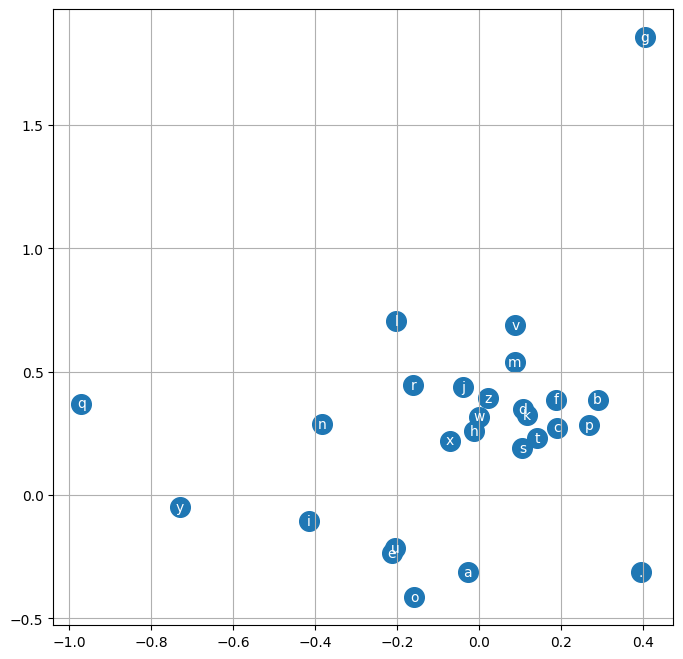

In [ ]:
#visualization of the embedding vector

plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data,s=200)
for i in range(C.shape[0]):
  plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha='center',va='center',color='white')
plt.grid('minor')

The embeddings are not random, there are some patterns observed, like the vowels are taken together, the character q is learned like a special character like '.' . with a larger dimensional embedding vector, more data could be learned.

In [ ]:
#sample names
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(30):
  out = []
  block_size = 3
  context = [0]*block_size
  while True:
    emb = C[torch.tensor([context])]
    h = torch.tanh(emb.view(1,-1) @ W1 + b1)
    logits = h @ W2 + b2
    probs = F.softmax(logits, dim=1)
    ix = torch.multinomial(probs, num_samples=1, generator=g).item()
    context = context[1:] + [ix]
    out.append(ix)
    if ix == 0:
      break
  print(''.join(itos[i] for i in out))



mona.
mayah.
seel.
nihahla.
remmastendrari.
adeer.
melin.
shi.
jen.
edelissopharlelle.
malaia.
nosher.
rishimiel.
kindrenelipanthusan.
brence.
ryyah.
fael.
yuma.
mys.
kyla.
hal.
salynn.
ufredley.
juren.
cre.
kiveaoshenoren.
fenno.
oba.
zpeiza.
amuey.
